<a href="https://colab.research.google.com/github/PeeranutAim/Amazon-Sentiment/blob/main/Amazon_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)


In [3]:
from google.colab import files

uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [4]:
df = pd.read_csv("amazon.csv")

In [5]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [6]:
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [7]:
df = df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True, axis=1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [8]:
def missing_values_analysis(df):
    return df.isnull().sum()

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print(f'Rows: {df.shape[0]}')
    print(f'Columns: {df.shape[1]}')

    print("TYPES".center(82, '~'))
    print(df.dtypes)

    print("MISSING VALUES".center(82, '~'))
    print(missing_values_analysis(df))  # Now this function is defined

    print("DUPLICATED VALUES".center(83, '~'))
    print(f'Duplicated Rows: {df.duplicated().sum()}')

    print("QUANTILES".center(82, '~'))
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print(df[numeric_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~

In [9]:
#data cleaning
df.isnull().sum()

,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0
score_average_rating,0


In [10]:
df.dropna()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109
...,...,...,...,...,...,...,...,...,...,...,...
1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000
1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000
1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000
1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000


In [11]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                                'Classes': [dataframe[i].nunique() \
                                            for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [12]:
def categorical_variable_summary(dataframe, variable):
    print(f"Summary for {variable}:\n")
    print(dataframe[variable].value_counts())
    print("\nPercentage distribution:\n")
    print(dataframe[variable].value_counts(normalize=True) * 100)


In [13]:
categorical_variable_summary(df, 'overall')


Summary for overall:

overall
5    3922
4     527
1     244
3     142
2      80
Name: count, dtype: int64

Percentage distribution:

overall
5    79.796541
4    10.722279
1     4.964395
3     2.889115
2     1.627670
Name: proportion, dtype: float64


In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import plotly.io as pio


pio.renderers.default = "colab"

def categorical_variable_summary(df, column_name):
    df = df.dropna(subset=[column_name])
    df = df[df[column_name] != '']
    df[column_name] = df[column_name].astype(str)

    unique_values = df[column_name].nunique()
    constraints = sns.color_palette("husl", unique_values).as_hex()

    print(df[column_name].value_counts())

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Countplot', 'Percentage'),
        specs=[[{"type": "xy"}, {"type": "domain"}]]
    )

    fig.add_trace(
        go.Bar(
            y=df[column_name].value_counts().values.tolist(),
            x=[str(i) for i in df[column_name].value_counts().index],
            text=df[column_name].value_counts().values.tolist(),
            textposition='auto',
            showlegend=False,
            marker=dict(color=constraints)
        ),
        row=1, col=1
    )


    fig.add_trace(
        go.Pie(
            labels=df[column_name].value_counts().keys(),
            values=df[column_name].value_counts().values,
            textfont=dict(size=18),
            showlegend=True,
            hole=0  # Ensure full pie chart
        ),
        row=1, col=2
    )

    fig.update_layout(template='plotly_white')

    fig.show()


categorical_variable_summary(df, 'overall')


overall
5    3922
4     527
1     244
3     142
2      80
Name: count, dtype: int64


In [15]:
df.reviewText.head()

,reviewText
2031,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449,I have tested dozens of SDHC and micro-SDHC ca...
4212,NOTE: please read the last update (scroll to ...
317,"If your card gets hot enough to be painful, it..."
4672,Sandisk announcement of the first 128GB micro ...


In [16]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [17]:
review_example = re.sub("[^a-zA-Z]", '',review_example)
review_example

'UPDATESomylovelywifeboughtmeaSamsungGalaxyTabforFathersDayandIvebeenlovingiteversinceJustasotherwithSamsungproductstheGalaxyTabhastheabilitytoaddamicroSDcardtoexpandthememoryonthedeviceSinceitsbeenoverayearIdecidedtodosomemoreresearchtoseeifSanDiskofferedanythingnewAsoftheirproductlineupformicroSDcardsfromworsttobestperformancewisearetheasfollowsSanDiskSanDiskUltraSanDiskUltraPLUSSanDiskExtremeSanDiskExtremePLUSSanDiskExtremePRONowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardYesthepublishedratingofmostallthesecardsexcepttheSanDiskregularareClassUHSIbutthatsjustaratingActualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricesSinceAmazondoesntcarrytheUltraPLUSmodelofmicroSDcardIhadtododirectcomparisonsbetweentheSanDiskUltraExtremeandExtremePLUSAsmentionedinmyearlierreviewIpurchasedtheSanDiskUltraformyGalaxySMyquestionwasdidIwanttopayovermoreforacardthatisfasterthantheoneIalreadyownedOrIcouldpayalmostdoubletoget

In [18]:
review_example = review_example.lower().split()
review_example

['updatesomylovelywifeboughtmeasamsunggalaxytabforfathersdayandivebeenlovingiteversincejustasotherwithsamsungproductsthegalaxytabhastheabilitytoaddamicrosdcardtoexpandthememoryonthedevicesinceitsbeenoverayearidecidedtodosomemoreresearchtoseeifsandiskofferedanythingnewasoftheirproductlineupformicrosdcardsfromworsttobestperformancewisearetheasfollowssandisksandiskultrasandiskultraplussandiskextremesandiskextremeplussandiskextremepronowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardyesthepublishedratingofmostallthesecardsexceptthesandiskregularareclassuhsibutthatsjustaratingactualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricessinceamazondoesntcarrytheultraplusmodelofmicrosdcardihadtododirectcomparisonsbetweenthesandiskultraextremeandextremeplusasmentionedinmyearlierreviewipurchasedthesandiskultraformygalaxysmyquestionwasdidiwanttopayovermoreforacardthatisfasterthantheoneialreadyownedoricouldpayalmostdoubletoge

In [19]:
rt = lambda x: re.sub("[^a-zA-Z]",'',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,updatesomylovelywifeboughtmeasamsunggalaxytabf...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,ihavetesteddozensofsdhcandmicrosdhccardsonedis...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,notepleasereadthelastupdatescrolltothebottomim...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,ifyourcardgetshotenoughtobepainfulitisdefectiv...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandiskannouncementofthefirstgbmicrosdtookinte...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [32]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = text.lower().strip()
        return text
    return ""

# Apply text cleaning
df["cleaned_review"] = df["reviewText"].apply(clean_text)

In [20]:
!pip install vaderSentiment textblob


In [21]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment_label
Positive    3456
Neutral      879
Negative     580
Name: count, dtype: int64


Text(0.5, 1.0, 'Negative Reviews')

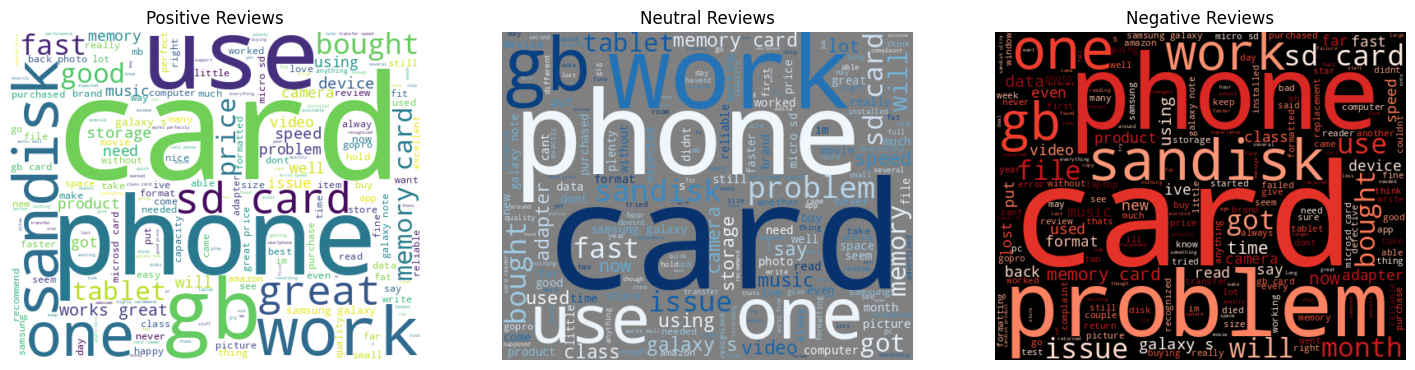

In [34]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud


nltk.download("vader_lexicon")
nltk.download("punkt")


df = pd.read_csv("amazon.csv")



def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = text.lower().strip()
        return text
    return ""


df["cleaned_review"] = df["reviewText"].apply(clean_text)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    if not text:
        return 0

    # VADER Score
    vader_score = sia.polarity_scores(text)["compound"]

    # TextBlob Score (alternative method)
    blob_score = TextBlob(text).sentiment.polarity

    # Combined Score (Weighted Average)
    final_score = (vader_score * 0.7) + (blob_score * 0.3)

    return final_score

# Apply sentiment scoring
df["sentiment_score"] = df["cleaned_review"].apply(get_sentiment)

# Classification based on scores
def classify_sentiment(score):
    if score >= 0.2:
        return "Positive"
    elif score <= -0.2:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(classify_sentiment)

# Display sentiment counts
sentiment_counts = df["sentiment_label"].value_counts()
print(sentiment_counts)



# Create WordClouds for all sentiment categories
positive_text = " ".join(df[df["sentiment_label"] == "Positive"]["cleaned_review"])
negative_text = " ".join(df[df["sentiment_label"] == "Negative"]["cleaned_review"])
neutral_text = " ".join(df[df["sentiment_label"] == "Neutral"]["cleaned_review"])  # ✅ ADDED Neutral WordCloud

plt.figure(figsize=(18, 6))

# Positive WordCloud
plt.subplot(1, 3, 1)
wordcloud_pos = WordCloud(width=500, height=400, background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews")

# Neutral WordCloud
plt.subplot(1, 3, 2)
wordcloud_neu = WordCloud(width=500, height=400, background_color="gray", colormap="Blues").generate(neutral_text)
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Reviews")

# Negative WordCloud
plt.subplot(1, 3, 3)
wordcloud_neg = WordCloud(width=500, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews")



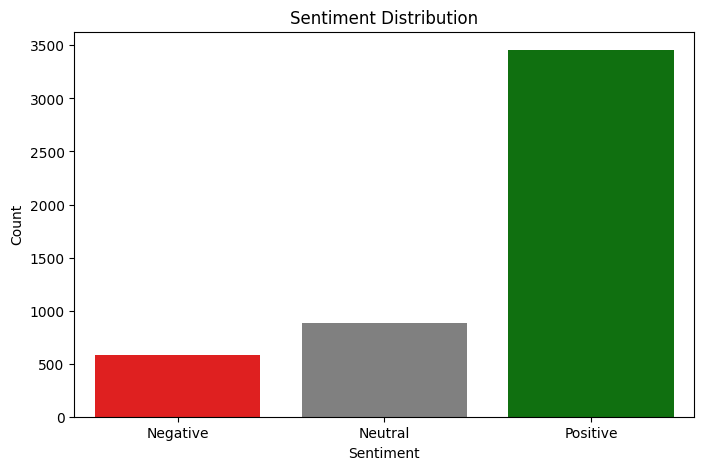

In [29]:
# Bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment_label", palette=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [35]:
plt.show()

# Pie Chart
fig = px.pie(df, names="sentiment_label", title="Sentiment Distribution", color="sentiment_label",
             color_discrete_map={"Positive": "green", "Negative": "red", "Neutral": "gray"})
fig.show()

